In [1]:
%%bash
cd /kaggle/working/
rm -rf /kaggle/working/bai_tap_thay_vinh
git clone https://github.com/daoanhkhoa123/bai_tap_thay_vinh.git

cd /kaggle/working/bai_tap_thay_vinh
wget -O /kaggle/working/bai_tap_thay_vinh/Lenna.png https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png
ls

KhoaDACE190399.zip
Lenna.png
main_code.py
push.cmd
README.md
README.pdf
run.ipynb


Cloning into 'bai_tap_thay_vinh'...
--2026-01-18 01:56:26--  https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 473831 (463K) [image/png]
Saving to: ‘/kaggle/working/bai_tap_thay_vinh/Lenna.png’

     0K .......... .......... .......... .......... .......... 10% 2.27M 0s
    50K .......... .......... .......... .......... .......... 21% 5.04M 0s
   100K .......... .......... .......... .......... .......... 32% 6.30M 0s
   150K .......... .......... .......... .......... .......... 43% 11.2M 0s
   200K .......... .......... .......... .......... .......... 54% 13.0M 0s
   250K .......... .......... .......... .......... .......... 64% 11.7M 0s
   300K .......... .......... .......... .......... .......... 75% 24.4M 0s
   350K 

In [2]:
%cd bai_tap_thay_vinh/
%ls

/kaggle/working/bai_tap_thay_vinh
KhoaDACE190399.zip  main_code.py  README.md   run.ipynb
Lenna.png           push.cmd      README.pdf


# Correlation Convolution

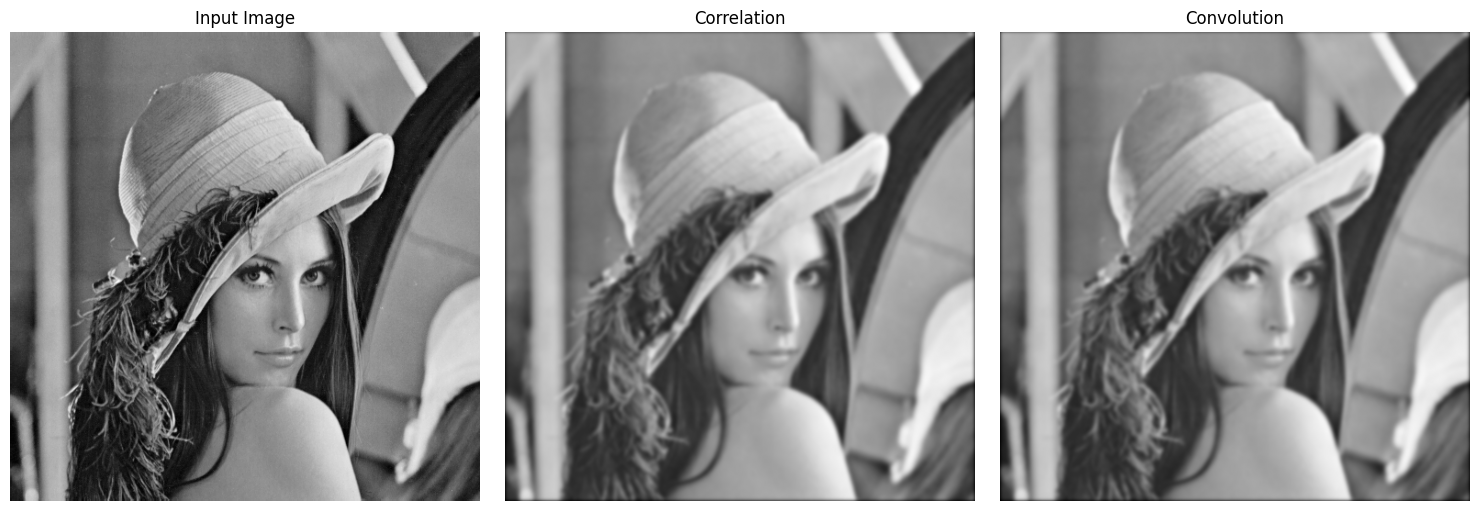

In [3]:
from main_code import *
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

img = cv.imread("/kaggle/working/bai_tap_thay_vinh/Lenna.png", cv.IMREAD_GRAYSCALE).astype(np.float32)

kernel = GaussianMask.mask_gauss(sigma=2.0, size=21)
kernel /= kernel.sum()

corr = Convolution_Correlation.correlation(img, kernel)
conv = Convolution_Correlation.convolution(img, kernel)

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.imshow(img, cmap="gray")
plt.title("Input Image")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(corr, cmap="gray")
plt.title("Correlation")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(conv, cmap="gray")
plt.title("Convolution")
plt.axis("off")

plt.tight_layout()
plt.show()


# Gaussian Kernel

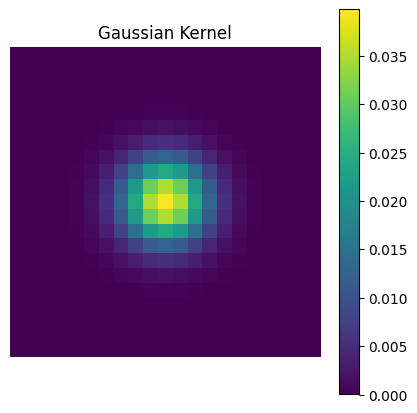

In [4]:
kernel = GaussianMask.mask_gauss(sigma=2.0, size=21)

plt.figure(figsize=(5,5))
plt.imshow(kernel, cmap="viridis")
plt.title("Gaussian Kernel")
plt.colorbar()
plt.axis("off")
plt.show()


# Compare

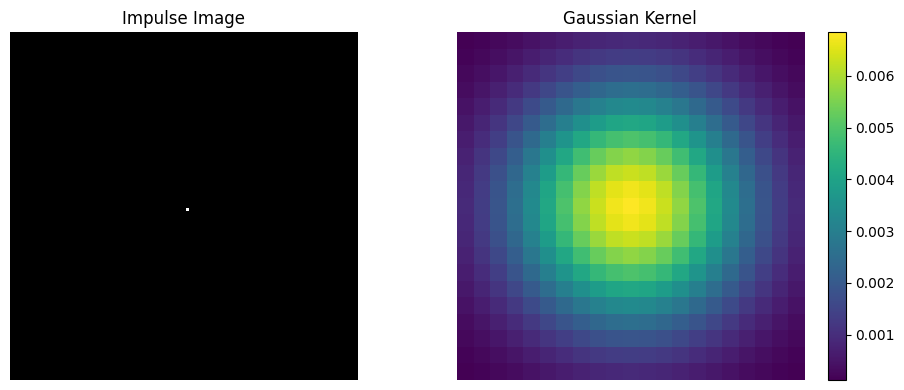

In [5]:
img = FilterImage.create_img(size=101, value=1).astype(np.float32)
kernel = GaussianMask.mask_gauss(sigma=5, size=21)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(img, cmap="gray")
plt.title("Impulse Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(kernel, cmap="viridis")
plt.title("Gaussian Kernel")
plt.colorbar()
plt.axis("off")

plt.tight_layout()
plt.show()


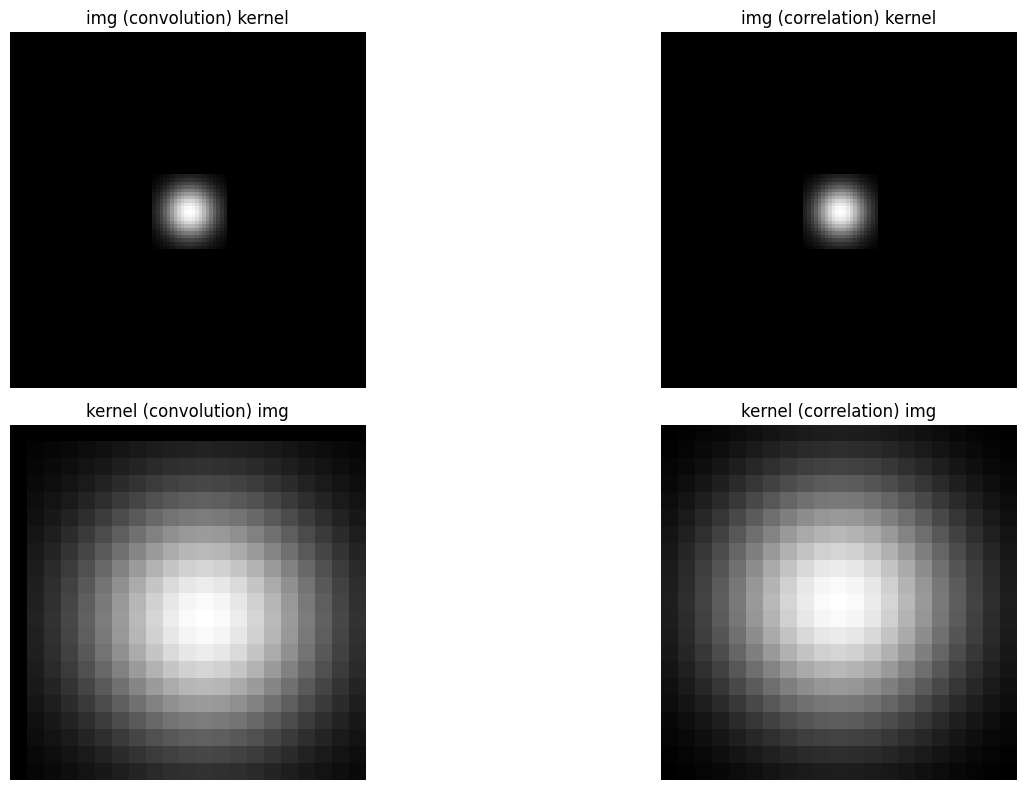

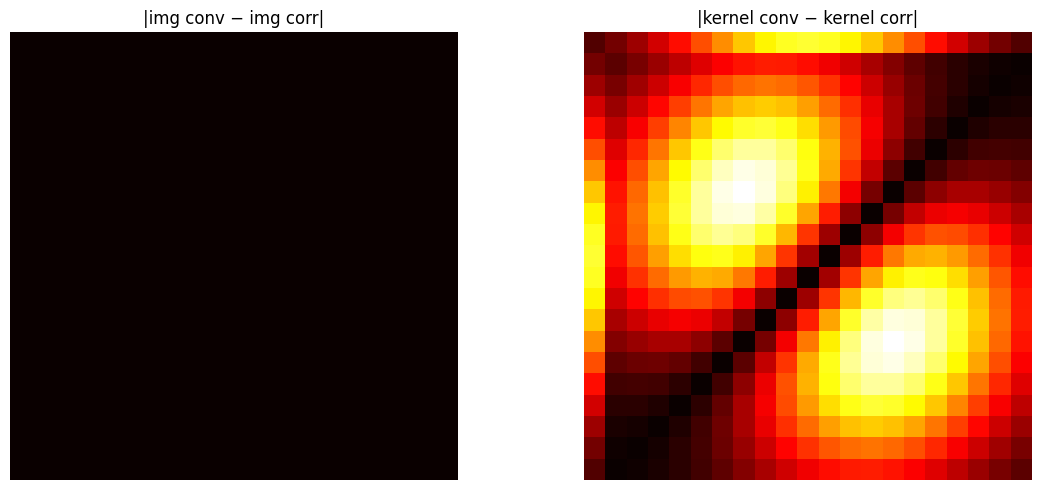

Mean |img conv - img corr|   : 0.0
Mean |kernel conv - kernel corr|: 0.0004947591


In [6]:
img = FilterImage.create_img(size=100, value=1).astype(np.float32)
kernel = GaussianMask.mask_gauss(sigma=5, size=21)

res_img_conv_kernel = Convolution_Correlation.convolution(img, kernel)
res_img_corr_kernel = Convolution_Correlation.correlation(img, kernel)
res_kernel_conv_img = Convolution_Correlation.convolution(kernel, img)
res_kernel_corr_img = Convolution_Correlation.correlation(kernel, img)

plt.figure(figsize=(16,8))

plt.subplot(2,2,1)
plt.imshow(res_img_conv_kernel, cmap="gray")
plt.title("img (convolution) kernel")
plt.axis("off")

plt.subplot(2,2,2)
plt.imshow(res_img_corr_kernel, cmap="gray")
plt.title("img (correlation) kernel")
plt.axis("off")

plt.subplot(2,2,3)
plt.imshow(res_kernel_conv_img, cmap="gray")
plt.title("kernel (convolution) img")
plt.axis("off")

plt.subplot(2,2,4)
plt.imshow(res_kernel_corr_img, cmap="gray")
plt.title("kernel (correlation) img")
plt.axis("off")

plt.tight_layout()
plt.show()

diff_img = np.abs(res_img_conv_kernel - res_img_corr_kernel)
diff_kernel = np.abs(res_kernel_conv_img - res_kernel_corr_img)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.imshow(diff_img, cmap="hot")
plt.title("|img conv − img corr|")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(diff_kernel, cmap="hot")
plt.title("|kernel conv − kernel corr|")
plt.axis("off")

plt.tight_layout()
plt.show()

print("Mean |img conv - img corr|   :", np.mean(diff_img))
print("Mean |kernel conv - kernel corr|:", np.mean(diff_kernel))


# Gaussian Pyramid

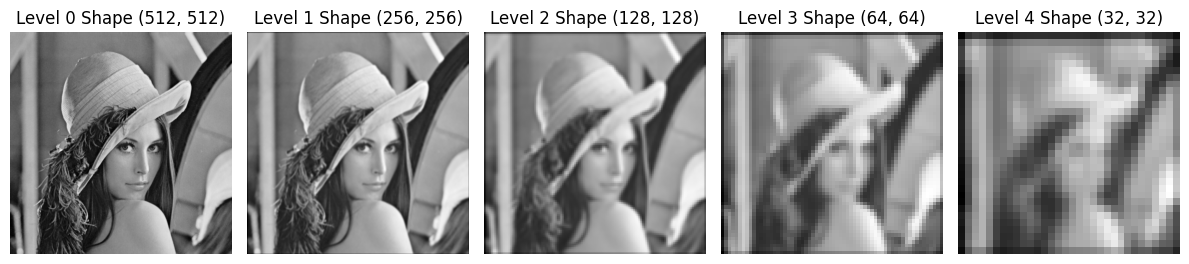

In [7]:
img = cv.imread("/kaggle/working/bai_tap_thay_vinh/Lenna.png", cv.IMREAD_GRAYSCALE).astype(np.float32)

pyramid = GaussianPyramid.gaussian_pyramid(
    img=img,
    size=7,
    sigma=1.5,
    time=4
)

plt.figure(figsize=(12,4))

for i, level in enumerate(pyramid):
    plt.subplot(1, len(pyramid), i + 1)
    plt.imshow(level, cmap="gray")
    plt.title(f"Level {i} Shape {level.shape}")
    plt.axis("off")

plt.tight_layout()
plt.show()


# Fourier Transform

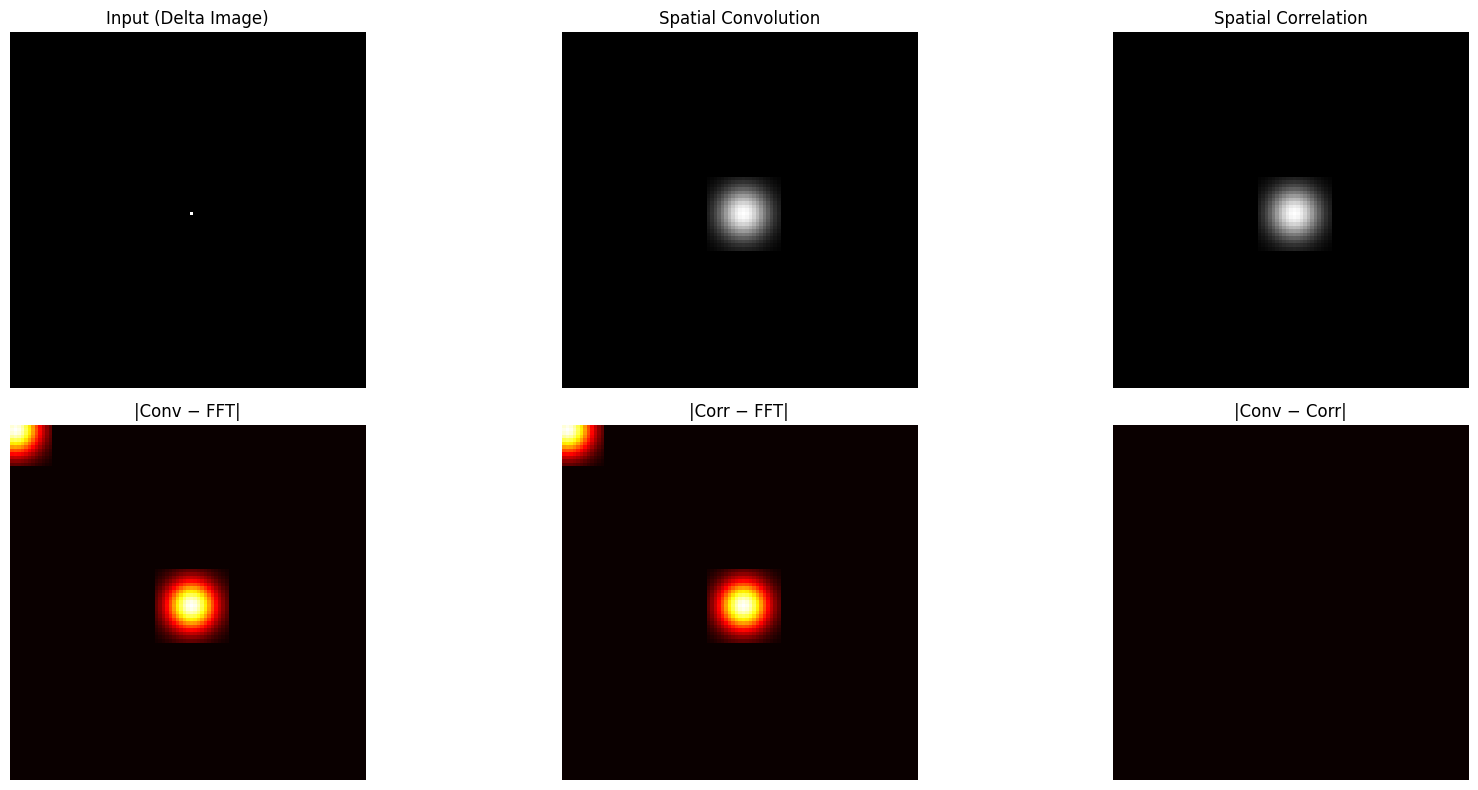

Mean |Conv - FFT| : 0.00013600936
Mean |Corr - FFT| : 0.00013600936
Mean |Conv - Corr|: 0.0


In [8]:
import numpy as np
import matplotlib.pyplot as plt

img = FilterImage.create_img(size=101, value=1).astype(np.float32)
kernel = GaussianMask.mask_gauss(sigma=5, size=21)
kernel /= kernel.sum()

spatial_conv = FilterImage.img_conv_kernel(img, kernel)
spatial_corr = FilterImage.img_corr_kernel(img, kernel)

pad = kernel.shape[0] // 2
img_pad = np.pad(img, ((pad, pad), (pad, pad)))
fft_result = FourierGaussianFilter.gaussian_fft(img_pad, kernel)
fft_same = fft_result[pad:-pad, pad:-pad]

diff_conv_fft = np.abs(spatial_conv - fft_same)
diff_corr_fft = np.abs(spatial_corr - fft_same)
diff_conv_corr = np.abs(spatial_conv - spatial_corr)

plt.figure(figsize=(18,8))

plt.subplot(2,3,1)
plt.imshow(img, cmap="gray")
plt.title("Input (Delta Image)")
plt.axis("off")

plt.subplot(2,3,2)
plt.imshow(spatial_conv, cmap="gray")
plt.title("Spatial Convolution")
plt.axis("off")

plt.subplot(2,3,3)
plt.imshow(spatial_corr, cmap="gray")
plt.title("Spatial Correlation")
plt.axis("off")

plt.subplot(2,3,4)
plt.imshow(diff_conv_fft, cmap="hot")
plt.title("|Conv − FFT|")
plt.axis("off")

plt.subplot(2,3,5)
plt.imshow(diff_corr_fft, cmap="hot")
plt.title("|Corr − FFT|")
plt.axis("off")

plt.subplot(2,3,6)
plt.imshow(diff_conv_corr, cmap="hot")
plt.title("|Conv − Corr|")
plt.axis("off")

plt.tight_layout()
plt.show()

print("Mean |Conv - FFT| :", np.mean(diff_conv_fft))
print("Mean |Corr - FFT| :", np.mean(diff_corr_fft))
print("Mean |Conv - Corr|:", np.mean(diff_conv_corr))


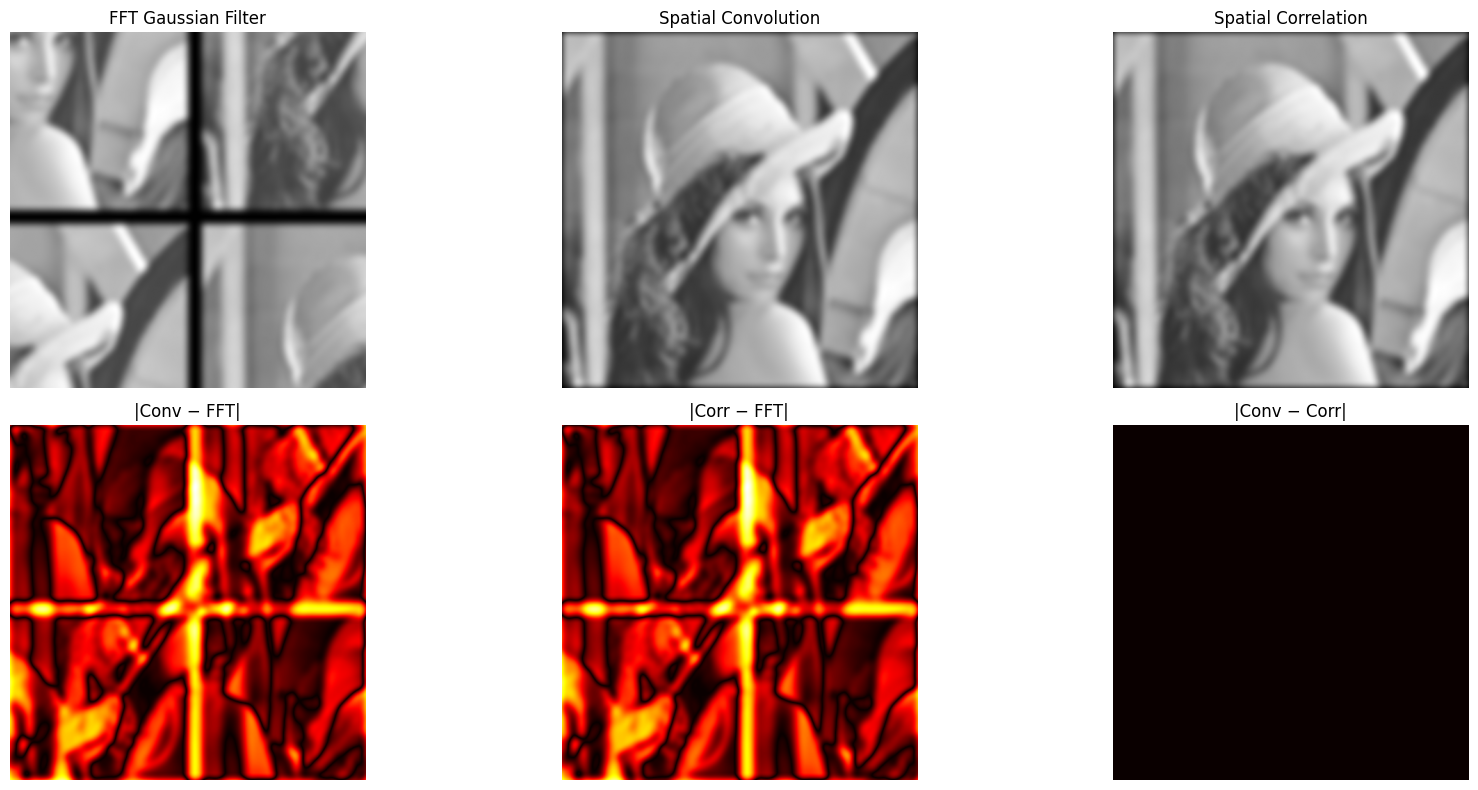

Mean |Conv - FFT| : 49.959843
Mean |Corr - FFT| : 49.959843
Mean |Conv - Corr|: 0.0


In [9]:
img = cv.imread("/kaggle/working/bai_tap_thay_vinh/Lenna.png", cv.IMREAD_GRAYSCALE).astype(np.float32)
kernel = GaussianMask.mask_gauss(sigma=5, size=21)
kernel /= kernel.sum()

spatial_conv = FilterImage.img_conv_kernel(img, kernel)
spatial_corr = FilterImage.img_corr_kernel(img, kernel)

pad = kernel.shape[0] // 2
img_pad = np.pad(img, ((pad, pad), (pad, pad)))
fft_result = FourierGaussianFilter.gaussian_fft(img_pad, kernel)
fft_same = fft_result[pad:-pad, pad:-pad]

diff_conv_fft = np.abs(spatial_conv - fft_same)
diff_corr_fft = np.abs(spatial_corr - fft_same)
diff_conv_corr = np.abs(spatial_conv - spatial_corr)

plt.figure(figsize=(18,8))

plt.subplot(2,3,1)
plt.imshow(fft_same, cmap="gray")
plt.title("FFT Gaussian Filter")
plt.axis("off")

plt.subplot(2,3,2)
plt.imshow(spatial_conv, cmap="gray")
plt.title("Spatial Convolution")
plt.axis("off")

plt.subplot(2,3,3)
plt.imshow(spatial_corr, cmap="gray")
plt.title("Spatial Correlation")
plt.axis("off")

plt.subplot(2,3,4)
plt.imshow(diff_conv_fft, cmap="hot")
plt.title("|Conv − FFT|")
plt.axis("off")

plt.subplot(2,3,5)
plt.imshow(diff_corr_fft, cmap="hot")
plt.title("|Corr − FFT|")
plt.axis("off")

plt.subplot(2,3,6)
plt.imshow(diff_conv_corr, cmap="hot")
plt.title("|Conv − Corr|")
plt.axis("off")

plt.tight_layout()
plt.show()

print("Mean |Conv - FFT| :", np.mean(diff_conv_fft))
print("Mean |Corr - FFT| :", np.mean(diff_corr_fft))
print("Mean |Conv - Corr|:", np.mean(diff_conv_corr))


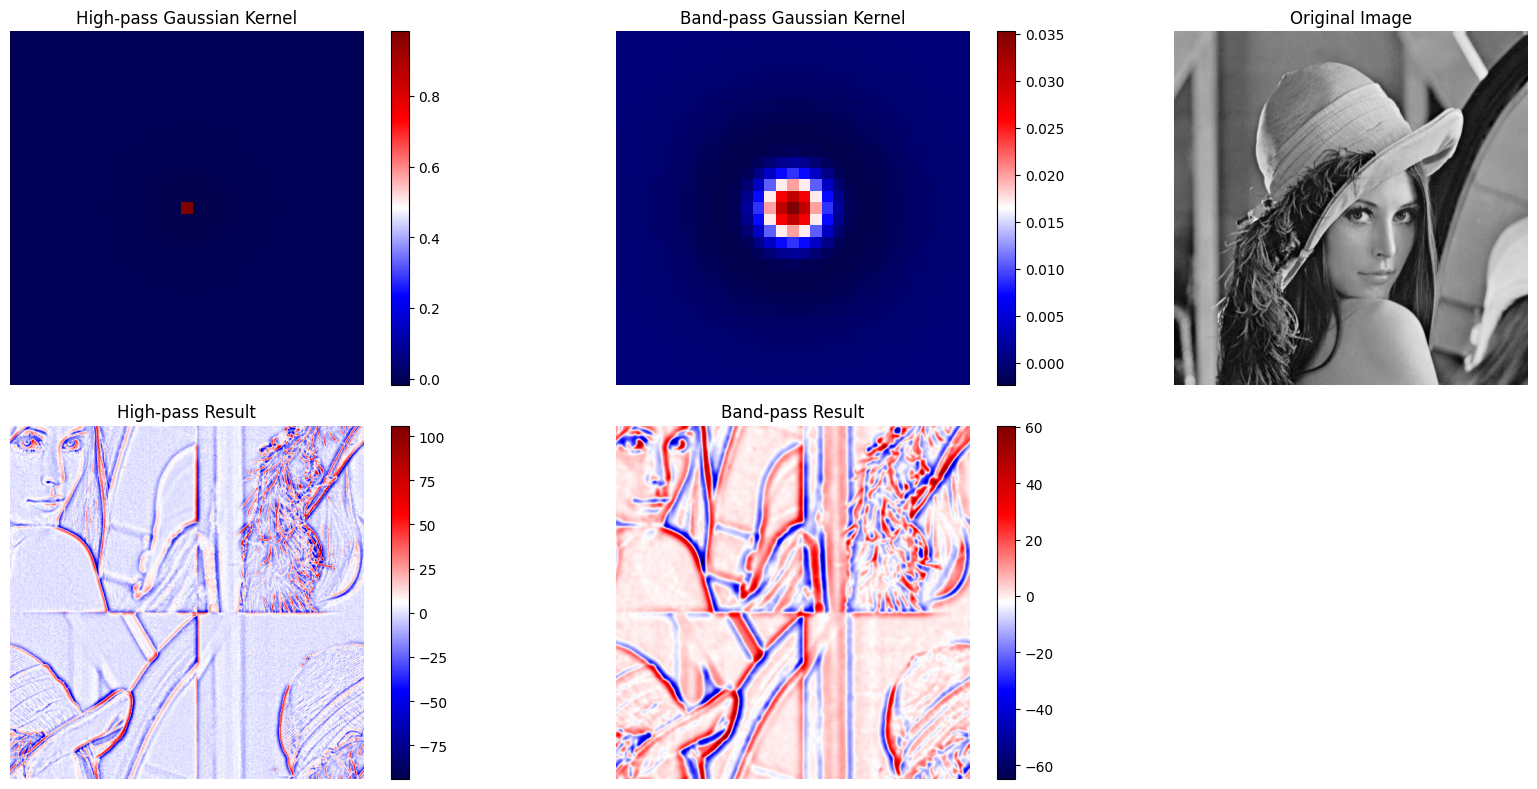

In [10]:
img = cv.imread("/kaggle/working/bai_tap_thay_vinh/Lenna.png", cv.IMREAD_GRAYSCALE).astype(np.float32)

sigma = 3
sigma_low = 2
sigma_high = 6
size = 31

hp_kernel = FourierGaussianFilter.high_pass_gaussian(sigma, size)
bp_kernel = FourierGaussianFilter.band_pass_gaussian(sigma_low, sigma_high, size)


hp_result = FourierGaussianFilter.gaussian_fft(img, hp_kernel)
bp_result = FourierGaussianFilter.gaussian_fft(img, bp_kernel)


plt.figure(figsize=(18,8))

plt.subplot(2,3,1)
im = plt.imshow(hp_kernel, cmap="seismic")
plt.title("High-pass Gaussian Kernel")
plt.colorbar(im, fraction=0.046)
plt.axis("off")

plt.subplot(2,3,2)
im = plt.imshow(bp_kernel, cmap="seismic")
plt.title("Band-pass Gaussian Kernel")
plt.colorbar(im, fraction=0.046)
plt.axis("off")

plt.subplot(2,3,3)
plt.imshow(img, cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(2,3,4)
im = plt.imshow(hp_result, cmap="seismic")
plt.title("High-pass Result")
plt.colorbar(im, fraction=0.046)
plt.axis("off")

plt.subplot(2,3,5)
im = plt.imshow(bp_result, cmap="seismic")
plt.title("Band-pass Result")
plt.colorbar(im, fraction=0.046)
plt.axis("off")

plt.tight_layout()
plt.show()


# Steerable Gaussian

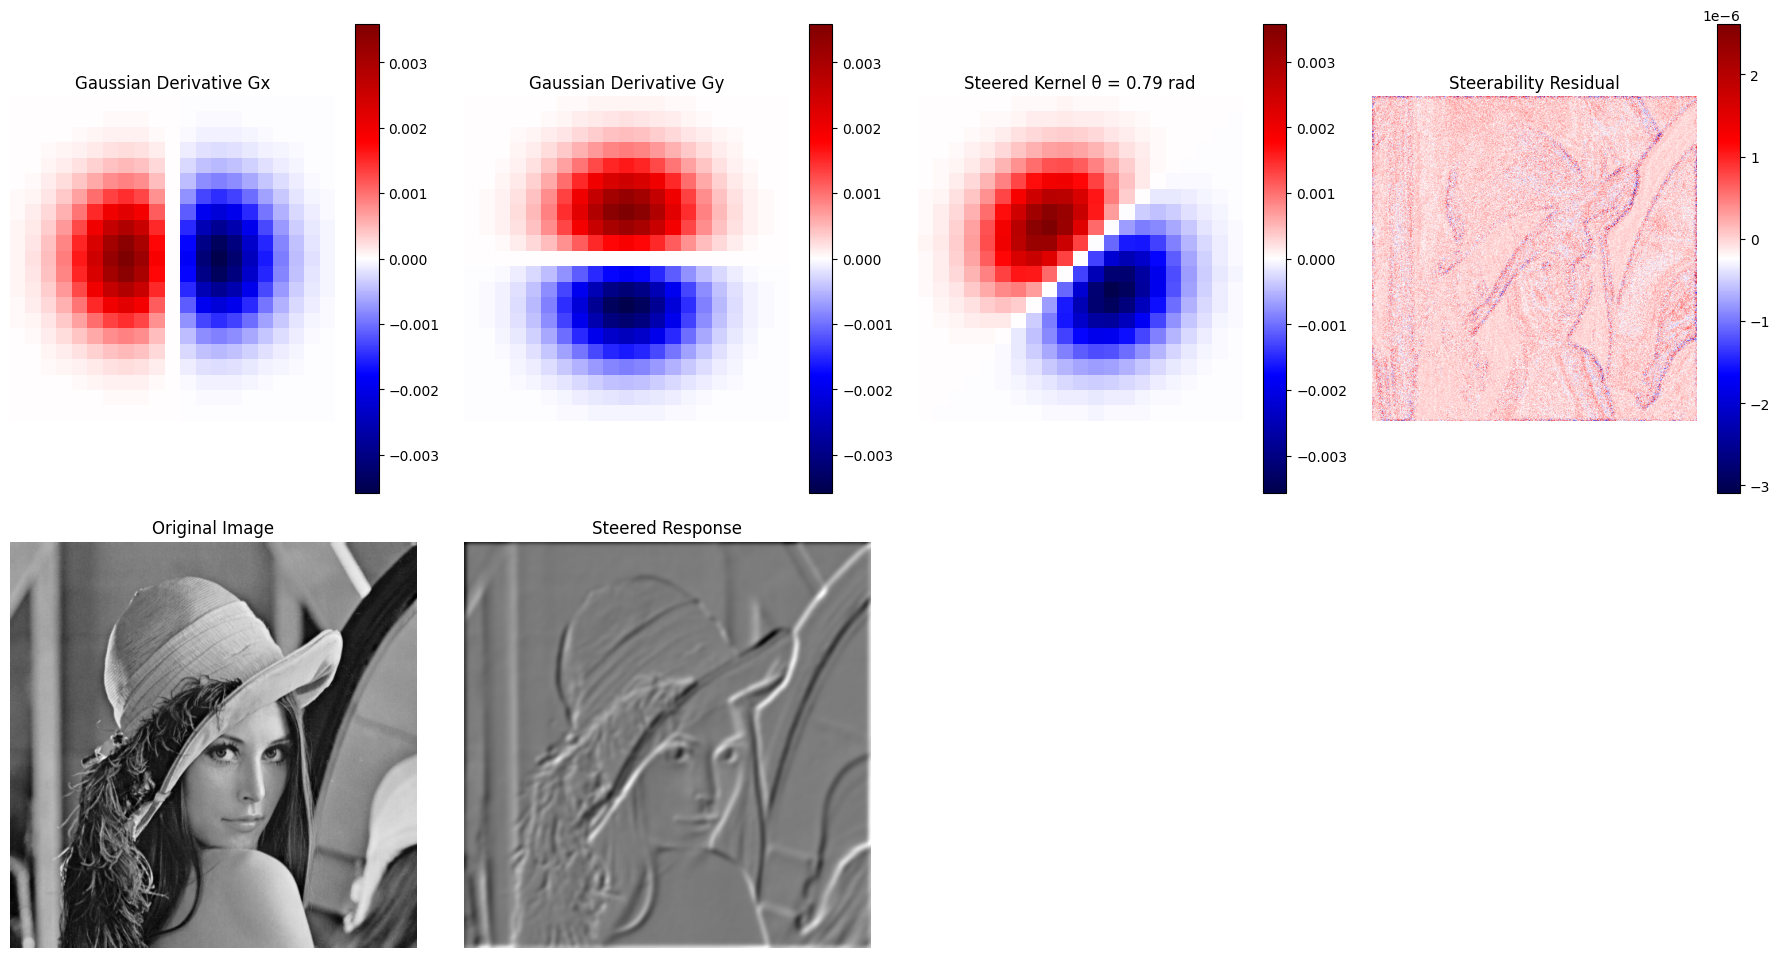

Average residual: -6.2032542998919654e-09


In [11]:
img = cv.imread(
    "/kaggle/working/bai_tap_thay_vinh/Lenna.png",
    cv.IMREAD_GRAYSCALE
).astype(np.float32)

theta = np.pi / 4  # 45 degrees

response, residual, G_theta, (Gx, Gy) = SteerabkeGaussian.steerable(
    img, theta, size=21, sigma=3.0
)

plt.figure(figsize=(18, 10))

plt.subplot(2, 4, 1)
plt.imshow(Gx, cmap="seismic")
plt.title("Gaussian Derivative Gx")
plt.colorbar()
plt.axis("off")

plt.subplot(2, 4, 2)
plt.imshow(Gy, cmap="seismic")
plt.title("Gaussian Derivative Gy")
plt.colorbar()
plt.axis("off")

plt.subplot(2, 4, 3)
plt.imshow(G_theta, cmap="seismic")
plt.title(f"Steered Kernel θ = {theta:.2f} rad")
plt.colorbar()
plt.axis("off")

plt.subplot(2, 4, 4)
plt.imshow(residual, cmap="seismic")
plt.title("Steerability Residual")
plt.colorbar()
plt.axis("off")

plt.subplot(2, 4, 5)
plt.imshow(img, cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(2, 4, 6)
plt.imshow(response, cmap="gray")
plt.title("Steered Response")
plt.axis("off")

plt.tight_layout()
plt.show()

print("Average residual:", residual.mean())
